In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
boston = pd.read_csv("Boston.csv")
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [4]:
boston_corr = boston.corr()

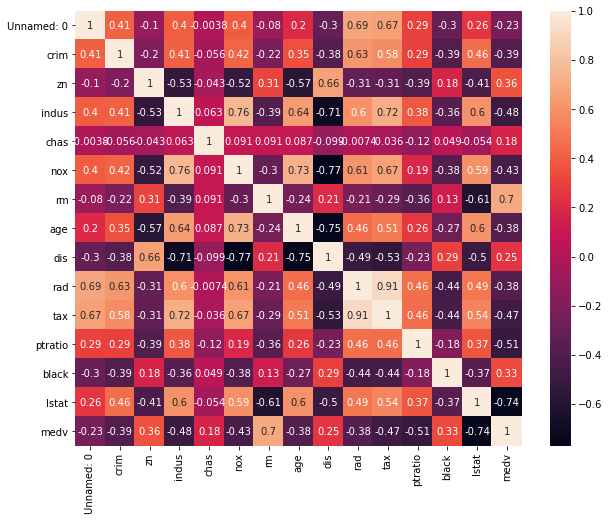

In [5]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(boston_corr,annot = True)

In [6]:
X = boston.drop('medv',axis=1)
y = boston['medv']

In [7]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X_scaled = scalar.fit_transform(X)

In [8]:
y = y.values.reshape(-1,1)

In [9]:
y_scaled = scalar.fit_transform(y)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_scaled,test_size = 0.2, random_state=42)

In [11]:
X_train.shape

(404, 14)

In [12]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(50, input_dim =14 , activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                750       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
epochs_hist = model.fit(X_train,y_train,epochs = 100,batch_size = 50,verbose = 1, validation_split = 0.25)

Epoch 1/100
7/7 [==============================] - 0s 30ms/step - loss: 0.1920 - val_loss: 0.0634
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0519 - val_loss: 0.0489
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0495 - val_loss: 0.0367
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0313 - val_loss: 0.0284
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0282 - val_loss: 0.0284
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0250 - val_loss: 0.0238
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0215 - val_loss: 0.0248
Epoch 8/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0204 - val_loss: 0.0205
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0173 - val_loss: 0.0190
Epoch 10/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0154 - val_loss: 0.0172
Epoch 11/100
7/7 [==========

7/7 [==============================] - 0s 5ms/step - loss: 0.0032 - val_loss: 0.0067
Epoch 85/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0032 - val_loss: 0.0069
Epoch 86/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0034 - val_loss: 0.0067
Epoch 87/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.0067
Epoch 88/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0030 - val_loss: 0.0068
Epoch 89/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0032 - val_loss: 0.0068
Epoch 90/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0033 - val_loss: 0.0066
Epoch 91/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0029 - val_loss: 0.0066
Epoch 92/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0029 - val_loss: 0.0067
Epoch 93/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0028 - val_loss: 0.0065
Epoch 94/100
7/7 [===============

In [16]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

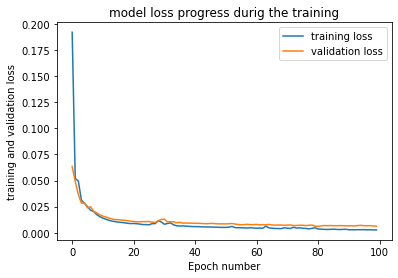

In [17]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('model loss progress durig the training')
plt.xlabel('Epoch number')
plt.ylabel('training and validation loss')
plt.legend(['training loss','validation loss'])

In [18]:
y_predict = model.predict(X_test)

In [19]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_predict)
print("predict score",score)

predict score 0.8590455450516092
